In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x= t_x/255.0
s_tt_x=tt_x/255.0
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)
t_x.shape[1:]

(28, 28)

In [2]:
def s_my_m(l=None): # * 튜플화 매개변수
    m = keras.Sequential()
    m.add(keras.layers.Flatten(input_shape=(28, 28)))
    if l:
        for i in l:
            m.add(i)
    m.add(keras.layers.Dense(10,activation='softmax'))
    m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
    return m

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5961 - accuracy: 0.7922 - val_loss: 0.4405 - val_accuracy: 0.8363
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4388 - accuracy: 0.8428 - val_loss: 0.3859 - val_accuracy: 0.8604
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4010 - accuracy: 0.8542 - val_loss: 0.3628 - val_accuracy: 0.8681
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3817 - accuracy: 0.8620 - val_loss: 0.3647 - val_accuracy: 0.8673
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3676 - accuracy: 0.8655 - val_loss: 0.3502 - val_accuracy: 0.8744
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3528 - accuracy: 0.8706 - val_loss: 0.3561 - val_accuracy: 0.8678
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3438 - accuracy: 0.8741 - val_loss: 0.3366 - val_accuracy:

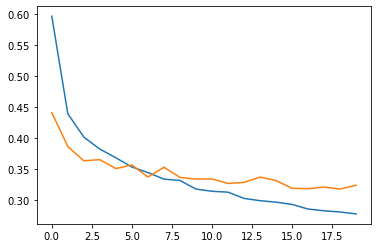

In [10]:
m = keras.Sequential()
m.add(keras.layers.Flatten(input_shape=(28, 28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.3)) #100에대해서 dropout
m.add(keras.layers.Dense(10,activation='softmax'))
# 신경망 구축
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')   
# 콜백
ck_p = keras.callbacks.ModelCheckpoint('best_m.h',save_best_only=True)
hy = m.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p])
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [11]:
m2 =keras.models.load_model('best_m.h') #다시실행해보기
m.evaluate(v_x,v_y)

375/375 [==============================] - 0s 933us/step - loss: 0.3233 - accuracy: 0.8863


[0.3233468234539032, 0.8863333463668823]

In [13]:
m2.evaluate(v_x,v_y)

375/375 [==============================] - 0s 963us/step - loss: 0.3173 - accuracy: 0.8874


[0.3172866106033325, 0.887416660785675]

In [6]:
m1 = keras.Sequential()
m1.add(keras.layers.Flatten(input_shape=(28,28)))
m1.add(keras.layers.Dense(100,activation='relu'))
m1.add(keras.layers.Dropout(0.3))
m1.add(keras.layers.Dense(10,activation='softmax'))
m1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('best1_m.h5',save_best_only=True)
e_st = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
m1.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p,e_st])

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5916 - accuracy: 0.7930 - val_loss: 0.4371 - val_accuracy: 0.8388
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4387 - accuracy: 0.8423 - val_loss: 0.4102 - val_accuracy: 0.8465
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4037 - accuracy: 0.8534 - val_loss: 0.3667 - val_accuracy: 0.8661
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8601 - val_loss: 0.3555 - val_accuracy: 0.8692
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3661 - accuracy: 0.8671 - val_loss: 0.3528 - val_accuracy: 0.8687
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3536 - accuracy: 0.8699 - val_loss: 0.3557 - val_accuracy: 0.8740
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3445 - accuracy: 0.8740 - val_loss: 0.3376 - val_accuracy:

In [7]:
m1.evaluate(v_x,v_y)

375/375 [==============================] - 0s 957us/step - loss: 0.3256 - accuracy: 0.8805


[0.325613796710968, 0.8805000185966492]

In [14]:
m2 =keras.models.load_model('best1_m.h5') #다시실행해보기
m2.evaluate(v_x,v_y)

375/375 [==============================] - 0s 920us/step - loss: 0.3256 - accuracy: 0.8805


[0.325613796710968, 0.8805000185966492]

In [17]:
def sig(x):
    return 1/(1+np.exp(-x))

(-5.0, 5.0, -0.2, 1.2)

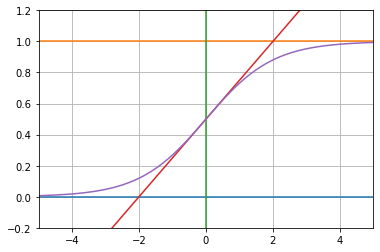

In [22]:
x = np.linspace(-5,5,200)
plt.plot([-5,5],[0,0])
plt.plot([-5,5],[1,1])
plt.plot([0,0],[-0.2,1.2])
plt.plot([-5,5],[-3/4,7/4])
plt.plot(x,sig(x))
plt.grid(True)
plt.axis([-5,5,-0.2,1.2])